# Practical session 2 - Practise with classic libraries

Students (pair):
- Pierre Mauron ([link](https://github.com/PMrnn/))
- Victor Calamy ([link](https://github.com/victor-calamy))

**Useful references for this lab**:

[1] `numpy`: [lecture notes (1.4.1-1.4.2)](https://scipy-lectures.org/intro/numpy/index.html) and [documentation](https://numpy.org/doc/stable/)

[2] `pandas`: [documentation](https://pandas.pydata.org/docs/getting_started/index.html), [quick tutorial](https://pandas.pydata.org/pandas-docs/version/0.15/10min.html)

[3] `matplotlib`: [lecture notes (1.5)](https://scipy-lectures.org/intro/matplotlib/index.html) and [documentation](https://matplotlib.org/)

[4] `h5py`: [quick start guide](http://docs.h5py.org/en/stable/quick.html#quick)

## <a name="content">Contents</a>
- [Exercise 1: Computing basic statistics](#ex1)
- [Exercise 2: Random variables and histograms](#ex2)
- [Exercise 3: Discrete isotropic total variation](#ex3)
---

In [35]:
%load_ext autoreload
%autoreload 2
import numpy as np
from numpy import random as rd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import pandas as pd
import sphynx
from IPython.display import display

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
## <a name="ex1">Exercise 1: Random variables and histograms</a>

In this exercise, we are interested in generating samples from the Gamma distribution $\mathcal{G}(\alpha,\beta)$, of probability density function (pdf)

\begin{equation}
    p(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} \exp(-\beta x) \mathbb{1}_{\mathbb{R}_+^*}(x),
\end{equation}

and displaying their histogram. In the following, we consider $(\alpha, \beta) = (9, 2)$.

1\. Set the random seed to a fixed value for reproducibility, and biefly check your instruction works as intended.
> Hint: you may take a look at the following pages: [random module](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random), [random generator](https://numpy.org/doc/stable/reference/random/generator.html).

**Answer**:

In [36]:
alpha = 9
beta = 2
random_seed = 0

rd.seed(random_seed)
x=rd.gamma(alpha,beta)
print(x)
rd.seed(random_seed)
y=rd.gamma(alpha,beta)
print(y)

29.932505167318606
29.932505167318606


On obtient bien deux fois la même valeur générée par la fonction alpha comme on a précisé une seed.

2\. Generate $\approx 10^5$ samples in a vector. Save the vector in a file, `samples.hdf5` or `samples.npy`.
> Warning / hint: 
> - take a careful look at the [documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html?highlight=gamma#numpy.random.gamma) (multiple conventions exist for the definition of the pdf underlying the distribution...);
> - to save data in a `npy` file, take a look at the example reported in the [Numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.save.html);
> - to save data in a `.h5` file, take a quick look at the [documentation here](https://docs.h5py.org/en/stable/quick.html#quick).

**Answer**:

In [37]:
rd.seed(random_seed)
gamma_samples = np.array([rd.gamma(alpha,beta) for i in range (10**5)])
print(gamma_samples)
np.save('samples.npy', gamma_samples)

[29.93250517 19.79775796 30.81829273 ... 32.40601914 18.35140936
 14.75185439]


3\. Estimate an histogram of this distribution for a well chosen set of bins, and display it.
> Warnings: 
> - make sure the [histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist) corresponds to a probability density function (pdf);
> - do not forget to include a proper title with names for the axes.

**Answer**:

Text(0, 0.5, 'Estimation de f(Gamma)')

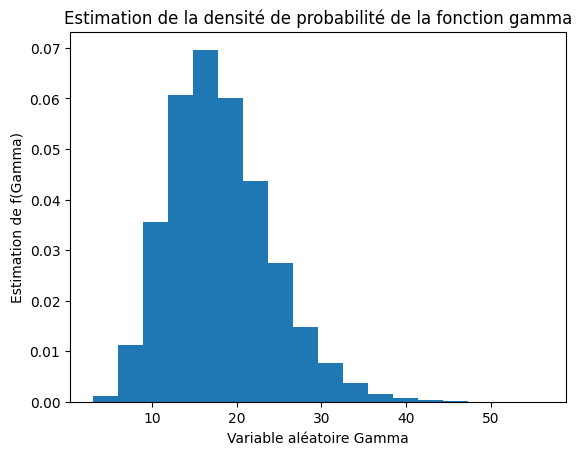

In [38]:
plt.hist(gamma_samples, density=True, bins=18)
plt.title('Estimation de la densité de probabilité de la fonction gamma')
plt.xlabel('Variable aléatoire Gamma')
plt.ylabel('Estimation de f(Gamma)')

4\. Overlay the probability density function on the histogram and compare these in a few words. Save the resulting picture in `.png` format.
> Hint: 
> - take a look at the `scipy` [documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) to avoid implementing the pdf from scratch;
> - return the bins in which the histogram is computed, and evaluate the pdf on those points.

**Answer**:

Text(0.5, 0, 'Variable aléatoire Gamma')

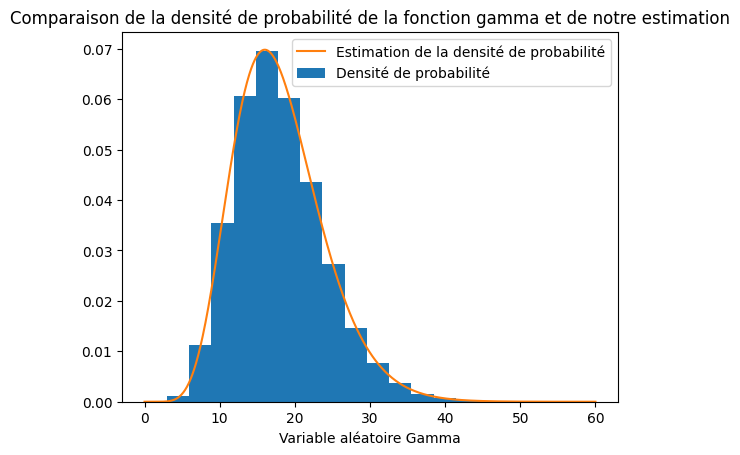

In [39]:
x = np.linspace(0,60,1000)
y = stats.gamma.pdf(x, alpha, scale=beta)
plt.hist(gamma_samples, density=True, bins=18)
plt.plot(x, y)
plt.legend(['Estimation de la densité de probabilité', 'Densité de probabilité'], loc='upper right')
plt.title('Comparaison de la densité de probabilité de la fonction gamma et de notre estimation')
plt.xlabel('Variable aléatoire Gamma')

---
## <a name="ex2">Exercise 2: Basic statistics with `pandas`</a>

In this second exercise, we focus on computing basic statistics, and applying linear regression to a small data set. These data are gathered in the following table, which gives the infant mortality (`X`) and the gross national product per inhabitant (`Y`) of 12 european countries :

| `X` | 190 | 128 | 180 | 212 | 56 | 192 | 68 | 98 | 110 | 197 | 181 | 233 |
|-----|-----|-----|-----|----|-----|----|----|-----|-----|-----|-----|-----|
| `Y` |  24 |  28 |  24 | 19 |  37 | 22 | 34 |  25 |  36 |  24 |  20 |  18 |

1\. For `X `and `Y`, compute the median, mean, variance and standard deviation. The data points have already been entered into a `.csv` file stored in `data/data.csv`.
> Hint: 
> - you can directly use `pandas` to load the data into a `DataFrame` ([`pd.read_csv`](https://pandas.pydata.org/docs/reference/frame.html));
> - take a look at the built-in operations available for `DataFrame` objects ([documentation](https://pandas.pydata.org/docs/reference/frame.html));
> - to display a `DataFrame` `f`:
> ```python 
> from IPython.display import display
> display(df)
> ```
> - sort the `DataFrame` with respect to the value of `X` (see [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values)) This will be useful for question 3.

**Answer**:

In [40]:
df = pd.read_csv('data/data.csv')
df.sort_values(by=['X'], inplace=True)
display(df)

,X,Y
4,56,37
6,68,34
7,98,25
8,110,36
1,128,28
2,180,24
10,181,20
0,190,24
5,192,22
9,197,24


In [41]:
median_X = df['X'].median()
mean_X = df['X'].mean()
var_X = df['X'].var()
std_X = df['X'].std()
median_Y = df['Y'].median()
mean_Y = df['Y'].mean()
var_Y = df['Y'].var()
std_Y = df['Y'].std()

print('Median of X : %.2f' %median_X)
print('Mean of X : %.2f' %mean_X)
print('Variance of X : %.2f' %var_X)
print('Standard deviation of X : %.2f' %std_X)
print('\n')
print('Median of Y : %.2f' %median_Y)
print('Mean of Y : %.2f' %mean_Y)
print('Variance of Y : %.2f' %var_Y)
print('Standard deviation of Y : %.2f' %std_Y)

Median of X : 180.50
Mean of X : 153.75
Variance of X : 3486.02
Standard deviation of X : 59.04


Median of Y : 24.00
Mean of Y : 25.92
Variance of Y : 42.45
Standard deviation of Y : 6.52


2\. Give the equation of the regression line of `Y` as a function of `X`.
> Hint: 
> - take a look at the functionalities available in `numpy` (e.g., `np.polyfit` and `np.polyval`);
> - if needed, note that you can retrieve the data from the resulting `pandas` `DataFrame` with the `to_numpy()` method.

**Answer**:

In [42]:
coeff = np.polyfit(df['X'], df['Y'], deg=1)
def f(x) :
    return coeff[0]*x+coeff[1]

3\. Display the cloud of points and the regression line $Y = f(X)$ on the same figure. Save the figure in `.png` format.

**Answer**:

Text(0, 0.5, 'Y')

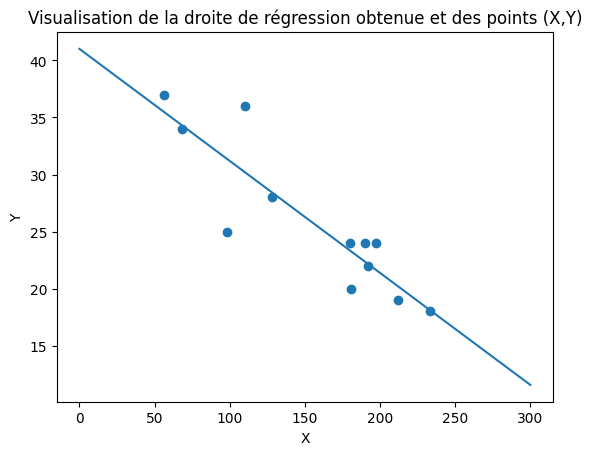

In [43]:
x = np.linspace(0,300,2)
plt.plot(x, f(x))
plt.scatter(df['X'],df['Y'])
plt.title('Visualisation de la droite de régression obtenue et des points (X,Y)')
plt.xlabel('X')
plt.ylabel('Y')

---
## <a name="ex3">Exercise 3: Discrete isotropic total variation</a>

This exercise is devoted to the computation of the discrete isotropic total variation (TV) of an input matrix $\mathbf{X} = [\mathbf{x}_n]_{1 \leq n \leq N} \in\mathbb{C}^{M \times N}$, which is particularly useful in Bayesian inference (e.g., for inverse problems) to promote piece-wise smooth solutions. The TV is defined as

\begin{equation*}
    \text{TV}(\mathbf{X}) = \Vert D(\mathbf{X}) \Vert_{1,2} = \sum_{m=1}^M \sum_{n=1}^N \sqrt{[\mathbf{XD}_h]^2_{m,n} + [\mathbf{D}_v\mathbf{X}]^2_{m,n}},
\end{equation*}

where $[\mathbf{Z}]_{m,n}$ denotes the elements in position $(m,n)$ of the matrix $\mathbf{Z}$,

\begin{align*}
    D(X) &= (\mathbf{XD}_h, \mathbf{D}_v\mathbf{X}) \in \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \\
    %
    \mathbf{XD}_h &= [\mathbf{x}_2-\mathbf{x}_1, \dotsc, \mathbf{x}_N-\mathbf{x}_{N-1}, \mathbf{0}_M] \in \mathbb{C}^{M\times N} \\
    %
    \mathbf{D}_v\mathbf{X} &= [\tilde{\mathbf{x}}_2^T-\tilde{\mathbf{x}}^T_1, \dotsc, \tilde{\mathbf{x}}^T_M-\tilde{\mathbf{x}}^T_{M-1}, \mathbf{0}_N]^T \in \mathbb{C}^{M\times N},
\end{align*}

$\mathbf{x}_n \in \mathbb{C}^{M}$ is the $n$-th column of $\mathbf{X}$, and $\tilde{\mathbf{x}}_m \in \mathbb{C}^{1\times N}$ is the $m$-th row of $\mathbf{X}$. 
The linear operator $D: \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} $ is the discrete gradient operator. The adjoint of $D$, $D^*: \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N}$, is given by

\begin{align*}
    (\forall \mathbf{Y} = (\mathbf{Y}_h,\mathbf{Y}_v)), \quad D^*(\mathbf{Y}) &= \mathbf{Y}_h\mathbf{D}^*_h + \mathbf{D}^*_v\mathbf{Y}_v \\
    %
    \mathbf{Y}_h\mathbf{D}^*_h &= \big[-\mathbf{y}_{h,1},- [\mathbf{y}_{h,n}-\mathbf{y}_{h,n-1}]_{2 \leq n \leq N-1}, \mathbf{y}_{h, N-1} \big] \\
    %
    \mathbf{D}^*_v\mathbf{Y}_v &= \big[-\tilde{\mathbf{y}}_{v,1}^T,- [\tilde{\mathbf{y}}_{v,m}^T-\tilde{\mathbf{y}}^T_{v,m-1}]_{2 \leq m \leq M-1}, \tilde{\mathbf{y}}^T_{v, M-1} \big]^T
\end{align*}

where $\mathbf{y}_{h,n}$ is the $n$-th column of $\mathbf{Y}_h$, and $\tilde{\mathbf{x}}_{v,m}$ is the $m$-th row of $\mathbf{Y}_v$.

1\. Using `numpy`, implement a function `gradient2D` to compute the 2D discrete gradient operator $D$ applied to a matrix $\mathbf{X}\in\mathbb{C}^{M \times N}$ (no for loops!). Trigger an error message whenever the input array has more than 2 dimensions. If not clear from the implementation, add a few short comments to explain your code.

> Hint: 
> - to trigger an error, you can for instance use an `assert` statement, or raise an [exception (e.g., `AssertionError`)](https://docs.python.org/3/library/exceptions.html);
> - only a few operations are needed: computing vertical differences, horizontal differences, and possibly a concatenation of matrices into a single tensor (= n-dimensional array);
> - possibly useful functions: `np.diff`, `np.c_`, `np.r_` (or `np.concatenate`). 

**Answer**:

In [44]:
def gradient2D(X):
  """return XDh and DvX as defined above"""
  if(len(X.shape)>2):
    raise AssertionError
  else:
      XDh= np.concatenate((np.diff(X),np.zeros((X.shape[0],1))),axis=1) #on fait la différenciation en colonnes et on ajoute une colonne de zéros
      DvX= np.concatenate((np.diff(X.T),np.zeros((X.shape[1],1))),axis=1).T #on fait la différenciation en lignes (d'où le recours à la transposée) et on ajoute une colonne de zéros avant de retransposer
      
      return(np.array[XDh,DvX])


2\. Implement a unit-test to validate the behaviour of the `gradient2D` function. For instance, you can check the format of the output, and test the result when the function is evaluated on a constant matrix (for both a square and a non-square input matrix). Run the unit-test from the present Jupyter notebook.

**Answer**:

In [45]:
!pytest

============================= test session starts =============================
platform win32 -- Python 3.9.4, pytest-7.1.3, pluggy-1.0.0
rootdir: c:\Users\Victor Calamy\Desktop\devoirsCentrale\G3\python\python_sdia\Labs\Lab2, configfile: pytest.ini
plugins: anyio-3.6.1
collected 4 items

tests\test_fctions.py F.FF                                               [100%]

================================== FAILURES ===================================
_______________________________ test_gradient2D _______________________________

    def test_gradient2D():
>       assert (np.array_equal(gradient2D(X1),X1_res) and np.array_equal(gradient2D(X2),X2_res))

tests\test_fctions.py:17: 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

X = array([[1, 2, 3],
       [4, 5, 6],
       [1, 3, 5],
       [2, 4, 6]])

    def gradient2D(X):
        """return XDh and DvX as defined above"""
        if(len(X.shape)>2):
          raise AssertionError
        else:
          

3\. Document the function `gradient2D` with an appropriate docstring (see Lab 1).

**Answer**:

!sphinx-build -b html src doc

4\. Using 1., define a function `tv` to compute $\text{TV}(\mathbf{X})$, $\mathbf{X}\in\mathbb{C}^{M \times N}$. Write a unit-test and document your function.

**Answer**:

In [46]:
def tv(X):
    """ compute TV(X) as defined above"""
    XDh,DvX = gradient2D(X)
    sum=0
    for m in range (len(XDh)):
        for n in range (len(XDh[0])):
            sum +=(XDh[m][n]**2 + DvX[m][n]**2)**(1/2)
            
    return(sum)

!pytest

============================= test session starts =============================
platform win32 -- Python 3.9.4, pytest-7.1.3, pluggy-1.0.0
rootdir: c:\Users\Victor Calamy\Desktop\devoirsCentrale\G3\python\python_sdia\Labs\Lab2, configfile: pytest.ini
plugins: anyio-3.6.1
collected 4 items

tests\test_fctions.py F.FF                                               [100%]

================================== FAILURES ===================================
_______________________________ test_gradient2D _______________________________

    def test_gradient2D():
>       assert (np.array_equal(gradient2D(X1),X1_res) and np.array_equal(gradient2D(X2),X2_res))

tests\test_fctions.py:17: 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

X = array([[1, 2, 3],
       [4, 5, 6],
       [1, 3, 5],
       [2, 4, 6]])

    def gradient2D(X):
        """return XDh and DvX as defined above"""
        if(len(X.shape)>2):
          raise AssertionError
        else:
          

5\. Implement a function `gradient2D_adjoint` to compute $D^*(\mathbf{Y})$, the adjoint of the 2D discrete gradient operator $D$ applied to $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$. Add a few short comments to explain your code whenever appropriate.

**Answer**:

In [47]:
def gradient2D_adjoint(Y):
  """return D* as defined above"""
  if(len(Y.shape)!=3):
    raise AssertionError
  else:
      Yh = Y[0]

      Yh_1=Yh[:,0].reshape(-1,1)
      Yh_N_1 = Yh[:,-2].reshape(-1,1)

      Yv = Y[1]
      Yv_1_tilde = Yv.T[:,0].reshape(-1,1)
      Yv_N_1_tilde = Yv.T[:,-2].reshape(-1,1)

      print( Yh.shape,Yv.shape)
      YhDh= np.concatenate((-Yh_1,-np.diff(Yh[:,:-1]),Yh_N_1),axis=1)
      DvYv= np.concatenate((-Yv_1_tilde,-np.diff(Yv.T[:,:-1]),Yv_N_1_tilde),axis=1).T

      print( YhDh.shape,DvYv.shape)
      return(YhDh + DvYv)


6\. Implement a unit-test to validate `gradient2D_adjoint`, e.g., by checking the size of the output from the function and verifying that `gradient2D_adjoint` is adjoint to `gradient2D`, i.e., for any $\mathbf{X}\in\mathbb{C}^{M \times N}$ and $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$:

\begin{equation}
    \forall \mathbf{X} \in \mathbb{C}^{M \times N}, \mathbf{Y} = (\mathbf{Y}_h, \mathbf{Y}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \;
    %
    \langle D(\mathbf{X}), \mathbf{Y} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{X}, D^*(\mathbf{Y}) \rangle_{\mathbb{C}^{M \times N}}, 
\end{equation}

where 

\begin{align}
    &\forall \mathbf{U}, \mathbf{V} \in \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N}} = \text{Tr}(\mathbf{U}^H \mathbf{V}) = \sum_{m=1}^M \sum_{n=1}^N u_{m,n}^* v_{m,n}, \\
    &\forall \mathbf{U} = (\mathbf{U}_h, \mathbf{U}_v), \mathbf{V} = (\mathbf{V}_h, \mathbf{V}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{U}_h, \mathbf{V}_h \rangle_{\mathbb{C}^{M \times N}} + \langle \mathbf{U}_v, \mathbf{V}_v \rangle_{\mathbb{C}^{M \times N}}.
\end{align}

> Hint: to verify `gradient2D_adjoint` is the adjoint of `gradient2D`, evaluate the scalar products above for randomly drawn matrices. Set the random generator to a known state for reproducibility (see [Exercise 1](#ex1)).

**Answer**:

In [48]:
!pytest

============================= test session starts =============================
platform win32 -- Python 3.9.4, pytest-7.1.3, pluggy-1.0.0
rootdir: c:\Users\Victor Calamy\Desktop\devoirsCentrale\G3\python\python_sdia\Labs\Lab2, configfile: pytest.ini
plugins: anyio-3.6.1
collected 4 items

tests\test_fctions.py F.FF                                               [100%]

================================== FAILURES ===================================
_______________________________ test_gradient2D _______________________________

    def test_gradient2D():
>       assert (np.array_equal(gradient2D(X1),X1_res) and np.array_equal(gradient2D(X2),X2_res))

tests\test_fctions.py:17: 
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

X = array([[1, 2, 3],
       [4, 5, 6],
       [1, 3, 5],
       [2, 4, 6]])

    def gradient2D(X):
        """return XDh and DvX as defined above"""
        if(len(X.shape)>2):
          raise AssertionError
        else:
          

[Bonus, **optional**]. Generalize the `gradient2D` to any number of dimensions ($\mathbf{X} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}$), i.e., by returning tensors obtained by computing differences along each of its dimensions.
> Hint: 
> - you may use a loops here, and/or list comprehension. Using slice objects (see [np.s_](https://numpy.org/doc/stable/reference/generated/numpy.s_.html?highlight=s_#numpy.s_) and [this page](https://stackoverflow.com/questions/24432209/python-index-an-array-using-the-colon-operator-in-an-arbitrary-dimension)) can be an interesting option.
>
> - the definition of the scalar product above can be extended to the case of tensors as follows:
> \begin{equation}
    \mathbf{U}, \mathbf{V} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}} =  \sum_{n_1 = 1}^{N_1}  \sum_{n_2 = 1}^{N_2} \dotsc \sum_{n_p = 1}^{N_p} u_{n_1, n_2, \dotsc, n_p}^* v_{n_1, n_2, \dotsc, n_p}   
\end{equation}

**Answer**:

In [49]:
# your code

## Reference

```bibtex
@article{condat:hal-01309685,
  TITLE = {{Discrete Total Variation: New Definition and Minimization}},
  AUTHOR = {Condat, Laurent},
  URL = {https://hal.archives-ouvertes.fr/hal-01309685},
  JOURNAL = {{SIAM Journal on Imaging Sciences}},
  PUBLISHER = {{Society for Industrial and Applied Mathematics}},
  VOLUME = {10},
  NUMBER = {3},
  PAGES = {1258--1290},
  YEAR = {2017},
  MONTH = Aug,
  DOI = {10.1137/16M1075247},
  KEYWORDS = { variational image processing ; total variation ;  finite-difference schemes ;  coarea formula},
  PDF = {https://hal.archives-ouvertes.fr/hal-01309685v3/file/Condat-newTV.pdf},
  HAL_ID = {hal-01309685},
  HAL_VERSION = {v3},
}
```
